In [ ]:
import pandas as pd
import re

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/tweet_dataset/Company_Tweet.csv')
df2 = pd.read_csv('/content/drive/MyDrive/tweet_dataset/Company.csv')
df3 = pd.read_csv('/content/drive/MyDrive/tweet_dataset/Tweet.csv')
df_news = pd.read_csv('/content/drive/MyDrive/us_equities_news_dataset.csv')

In [ ]:
ds = pd.merge(df3, df, on='tweet_id', how='inner')
ds['release_date'] = pd.to_datetime(ds['post_date'], unit='s').dt.date

#changing tweet id to category tweets
ds.rename(columns = {'ticker_symbol':'ticker', 'tweet_id':'category', 'body':'content'}, inplace = True)
ds['category'] = 'tweet'

In [ ]:
twitter_ds = ds
twitter_ds.drop("post_date", axis=1, inplace=True)
twitter_ds_i = twitter_ds[ (twitter_ds['comment_num'] > 100) | (twitter_ds['retweet_num'] > 100) | (twitter_ds['like_num']> 100)]

In [ ]:
twitter_ds_i.drop("comment_num", axis=1, inplace=True)
twitter_ds_i.drop("retweet_num", axis=1, inplace=True)
twitter_ds_i.drop("like_num", axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
def covertdate_string(x):
  return x.strftime("%Y-%d-%m")
  
def remove_url(x):
  return re.sub(r'http\S+', '', x)

In [ ]:
twitter_ds_i['content'] = twitter_ds_i['content'].apply(remove_url)
twitter_ds_i = twitter_ds_i.drop_duplicates()
twitter_ds_i['title'] = 'Nil'
twitter_ds_i = twitter_ds_i.reset_index(drop = True)
twitter_ds_i['release_date'] = twitter_ds_i['release_date'].apply(covertdate_string)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
news_ds = df_news
news_ds.rename(columns = {'provider' : 'writer'}, inplace = True)
news_ds.drop('id',axis=1,inplace=True)
news_ds.drop('url',axis=1,inplace=True)
news_ds.drop('article_id',axis=1,inplace=True)

In [ ]:
news_ds.head()

,ticker,title,category,content,release_date,writer
0,NIO,Why Shares of Chinese Electric Car Maker NIO A...,news,What s happening\nShares of Chinese electric c...,2020-01-15,The Motley Fool
1,NIO,NIO only consumer gainer Workhorse Group amon...,news,Gainers NIO NYSE NIO 7 \nLosers MGP Ingr...,2020-01-18,Seeking Alpha
2,NIO,NIO leads consumer gainers Beyond Meat and Ma...,news,Gainers NIO NYSE NIO 14 Village Farms In...,2020-01-15,Seeking Alpha
3,NIO,NIO NVAX among premarket gainers,news,Cemtrex NASDAQ CETX 85 after FY results \n...,2020-01-15,Seeking Alpha
4,NIO,PLUG NIO among premarket gainers,news,aTyr Pharma NASDAQ LIFE 63 on Kyorin Pharm...,2020-01-06,Seeking Alpha


In [ ]:
twitter_ds_i.head()

,category,writer,content,ticker,release_date,title
0,tweet,WSJ,Jeff Bezos lost $7.4 billion in Amazon's worst...,AMZN,2015-01-01,Nil
1,tweet,greatspoke,Analyst Report on Top Stock Market Options for...,AAPL,2015-01-01,Nil
2,tweet,greatspoke,Analyst Report on Top Stock Market Options for...,AMZN,2015-01-01,Nil
3,tweet,greatspoke,Top Stock Analyst Releases Report on Top Stock...,AAPL,2015-01-01,Nil
4,tweet,WSJ,"See how tech companies like Apple, Twitter and...",AAPL,2015-01-01,Nil


In [ ]:
final_ds = pd.concat([news_ds, twitter_ds_i])
final_ds = final_ds.sort_values('release_date').reset_index(drop = True)

In [ ]:
final_ds

,ticker,title,category,content,release_date,writer
0,KYOCY,Nikkei down 1 4 pct on economy fears autos drop,news,Nikkei down 1 4 pct hits lowest point in ove...,2008-10-02,Reuters
1,C,GLOBAL MARKETS Stocks rally on Wells Wachovia ...,news,U S stocks rally dollar gains on European w...,2008-10-03,Reuters
2,TGT,FOREX Dollar poised for biggest weekly gain in...,news,Money market squeeze ECB shift fuel dollar ...,2008-10-03,Reuters
3,WFC,GLOBAL MARKETS U S bailout plan passes inves...,news,U S House of Representatives approves bailou...,2008-10-03,Reuters
4,WFC,GLOBAL MARKETS Stocks hold up after Wells Wach...,news,Europe stocks U S stock futures up on Well...,2008-10-03,Reuters
...,...,...,...,...,...,...
232843,MRO,Marathon Oil misses Q4 number amid lower oil a...,news,Marathon Oil NYSE MRO 2 6 after hours foll...,2020-02-13,Seeking Alpha
232844,CSCO,Cisco Systems CSCO Q2 Earnings And Revenues ...,opinion,Cisco Systems NASDAQ CSCO came out with quar...,2020-02-13,Zacks Investment Research
232845,CSCO,Cisco beats on earnings shares barely budge,news,Cisco beat expectations on the top and bottom ...,2020-02-13,CNBC
232846,T,Why T Mobile s deal with Sprint could be the w...,news,T Mobile s deal with Sprint may usher in the n...,2020-02-13,CNBC


In [ ]:
from google.colab import files

final_ds.to_csv('financial_oped_tweets.csv', encoding = 'utf-8-sig') 
files.download('financial_oped_tweets.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/financial_oped_tweets.csv')

In [ ]:
df = df.reset_index(drop = True)

In [ ]:
df

,Unnamed: 0,ticker,title,category,content,release_date,writer
0,0,KYOCY,Nikkei down 1 4 pct on economy fears autos drop,news,Nikkei down 1 4 pct hits lowest point in ove...,2008-10-02,Reuters
1,1,C,GLOBAL MARKETS Stocks rally on Wells Wachovia ...,news,U S stocks rally dollar gains on European w...,2008-10-03,Reuters
2,2,TGT,FOREX Dollar poised for biggest weekly gain in...,news,Money market squeeze ECB shift fuel dollar ...,2008-10-03,Reuters
3,3,WFC,GLOBAL MARKETS U S bailout plan passes inves...,news,U S House of Representatives approves bailou...,2008-10-03,Reuters
4,4,WFC,GLOBAL MARKETS Stocks hold up after Wells Wach...,news,Europe stocks U S stock futures up on Well...,2008-10-03,Reuters
...,...,...,...,...,...,...,...
232843,232843,MRO,Marathon Oil misses Q4 number amid lower oil a...,news,Marathon Oil NYSE MRO 2 6 after hours foll...,2020-02-13,Seeking Alpha
232844,232844,CSCO,Cisco Systems CSCO Q2 Earnings And Revenues ...,opinion,Cisco Systems NASDAQ CSCO came out with quar...,2020-02-13,Zacks Investment Research
232845,232845,CSCO,Cisco beats on earnings shares barely budge,news,Cisco beat expectations on the top and bottom ...,2020-02-13,CNBC
232846,232846,T,Why T Mobile s deal with Sprint could be the w...,news,T Mobile s deal with Sprint may usher in the n...,2020-02-13,CNBC


In [ ]:
df["title_Length"]= df["title"].str.len()
df["content_Length"]= df["content"].str.len()

In [ ]:
df.head(5)

,Unnamed: 0,ticker,title,category,content,release_date,writer,title_Length,content_Length
0,0,KYOCY,Nikkei down 1 4 pct on economy fears autos drop,news,Nikkei down 1 4 pct hits lowest point in ove...,2008-10-02,Reuters,48,3935.0
1,1,C,GLOBAL MARKETS Stocks rally on Wells Wachovia ...,news,U S stocks rally dollar gains on European w...,2008-10-03,Reuters,64,4540.0
2,2,TGT,FOREX Dollar poised for biggest weekly gain in...,news,Money market squeeze ECB shift fuel dollar ...,2008-10-03,Reuters,55,3756.0
3,3,WFC,GLOBAL MARKETS U S bailout plan passes inves...,news,U S House of Representatives approves bailou...,2008-10-03,Reuters,63,5113.0
4,4,WFC,GLOBAL MARKETS Stocks hold up after Wells Wach...,news,Europe stocks U S stock futures up on Well...,2008-10-03,Reuters,55,2860.0


In [ ]:
a = df['title_Length'].sum()/df['title_Length'].count()
a

54.20087353123068

In [ ]:
b = df['content_Length'].sum()/df['content_Length'].count()
b

3329.6084478611924

In [ ]:
a/b*100

1.6278452670928065

In [ ]:
len(df['category'].unique())

3

In [ ]:
df[df['ticker'] == 'AAPL']

In [ ]:
import numpy as np

In [ ]:
df.groupby(df['category']).sum()

,Unnamed: 0
category,
news,10406215199
opinion,14695218609
tweet,2007545320


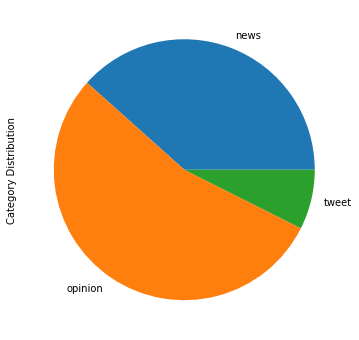

In [ ]:
df.groupby(df['category']).sum()
series = pd.Series([10406215199,14695218609,2007545320], index=["news", "opinion", "tweet"], name="Category Distribution")
series.plot.pie(figsize=(6, 6));